<a href="https://colab.research.google.com/github/DanZavas/Data_Atv_8/blob/main/Atv8_Projeto_Danilo_Zavarize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CABEÇALHO
##### Universidade Federal do Maranhão - UFMA
##### Diretoria de Tecnologias na Educação - DTED
##### Curso de Especialização em Análise de Dados e Inteligência Artificial
##### Disciplina de Programação para Ciência de Dados
##### **DOCENTE**: Prof. Dr. Raimundo Nonato Diniz Costa Filho
##### **DISCENTE**: Danilo Gualberto Zavarize

# QUESTÃO 1
##### A cidade de São Joaquim encontra-se localizada no estado de Santa Catarina. Tendo em vista sua latitude (28° 17’ 38”) e altitude (1.354 m), a citada cidade é considerada uma das mais frias do Brasil. Ocasionalmente, nos dias de frio mais intenso, ocorrem precipitações sob a forma de neve, sendo os meses mais frio julho e agosto. Dados obtidos no portal do Inmet (https://portal.inmet.gov.br/dadoshistoricos, acesso em 12/07/2024) para o ano de 2023 apresentam os valores de temperatura durante as 24 horas do dia e para todo o ano. Utilize as bibliotecas Panda, Numpy e MatPlotlib para responder as seguintes questões (3 Pontos):


##### **Item 1**
Leia o arquivo “São_Joaquim.csv” e acesse a coluna H. Calcule a temperatura média, mínima e máxima do ano de 2023 na cidade de São Joaquim. Qual o desvio padrão?

In [83]:
# Importando o Arquivo .csv
import pandas as pd
questao1=pd.read_csv('https://github.com/DanZavas/Data_Atv_8/raw/main/S%C3%A3o_Joaquim.CSV',sep = ';', decimal=",",encoding = 'latin-1')
# Calculando a Temperatura Média, Mínima, Máxima e seu Desvio-Padrão
import numpy as np
print("A temperatura média em São Joaquim em 2023 foi:", np.round(np.mean(questao1['Temperatura']),2),"°C")
print("A temperatura mínima em São Joaquim em 2023 foi:", np.round(np.min(questao1['Temperatura']),2),"°C")
print("A temperatura máxima em São Joaquim em 2023 foi:", np.round(np.max(questao1['Temperatura']),2),"°C")
print("O desvio-padrão da temperatura em São Joaquim em 2023 foi:", np.round(np.std(questao1['Temperatura']),2),"°C")

A temperatura média em São Joaquim em 2023 foi: 14.77 °C
A temperatura mínima em São Joaquim em 2023 foi: -0.5 °C
A temperatura máxima em São Joaquim em 2023 foi: 29.3 °C
O desvio-padrão da temperatura em São Joaquim em 2023 foi: 4.58 °C


##### **Item 2**
Faça o gráfico boxplot da temperatura na cidade de São Joaquim no ano de 2023.

Text(0.5, 0.98, 'Distribuição Mensal das Temperaturas Mínima e Máxima em São Joaquim - SC em 2023')

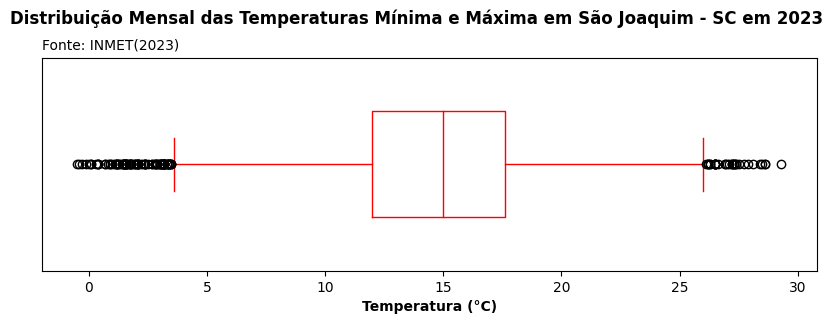

In [110]:
# Importando Pacote e Plotando Gráfico de Caixa
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plot_gc=questao1['Temperatura'].plot.box(vert=False,color='red',widths=0.5)
plot_gc.set_xlabel('Temperatura (°C)',fontweight='bold')
plt.gca().get_yaxis().set_visible(False)
plt.title('Fonte: INMET(2023)',loc='left',fontsize=10)
plt.subplots_adjust(top=0.82)
plt.suptitle('Distribuição Mensal das Temperaturas Mínima e Máxima em São Joaquim - SC em 2023',fontweight='bold')

##### **Item 3**
Faça um gráfico de barras com as temperaturas mínimas e máximas para cada mês do ano de 2023.

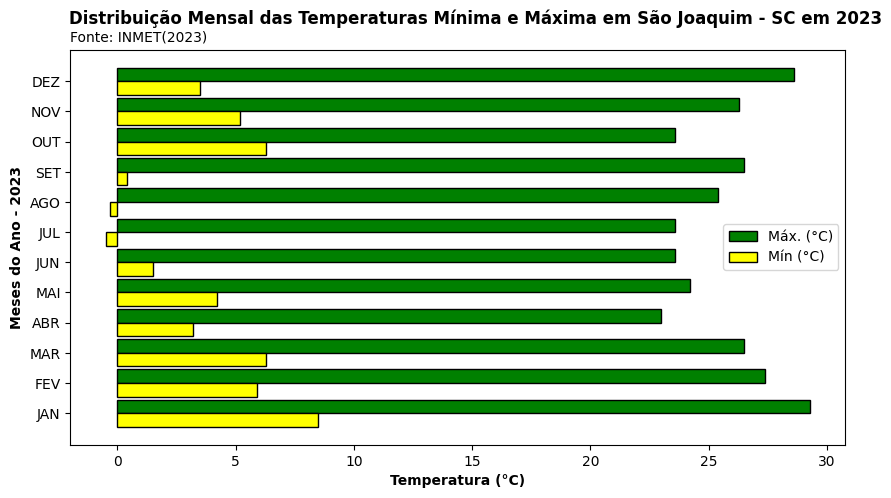

In [129]:
# Faz-se a Conversão da Data
questao1['Data']=pd.to_datetime(questao1['Data'],format='mixed')

## Agrupa-se por Meses do Ano
agp_m_min=questao1.groupby(questao1['Data'].dt.month)['Temperatura'].min()
agp_m_max=questao1.groupby(questao1['Data'].dt.month)['Temperatura'].max()
agp_m_mes=["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]

# Ajustando as Barras do Gráfico
y=np.arange(len(agp_m_mes))
largura=0.45

# Plotando o Gráfico de Barras
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y+largura/2, agp_m_max, largura, label='Máx. (°C)', color='green',edgecolor='black')
ax.barh(y-largura/2, agp_m_min, largura, label='Mín (°C)', color='yellow',edgecolor='black')
ax.set_ylabel('Meses do Ano - 2023',fontweight='bold')
ax.set_xlabel('Temperatura (°C)',fontweight='bold')
plt.title('Fonte: INMET(2023)',loc='left',fontsize=10)
plt.subplots_adjust(top=0.90)
plt.suptitle('Distribuição Mensal das Temperaturas Mínima e Máxima em São Joaquim - SC em 2023',fontweight='bold',x=0.53)
ax.set_yticks(y)
ax.set_yticklabels(agp_m_mes)
ax.legend()
plt.show()

# QUESTÃO 2
##### O atual regime constitucional do Brasil é o presidencialismo. O mandato do presidente da República do Brasil é de quatro anos com direito a uma disputa pela reeleição consecutiva. A última eleição para presidente aconteceu no ano de 2022, com os seguintes candidatos: Luis Inácio (Lula), Jair Bolsonaro, Simone Tebet, Ciro Gomes, Soraya Thronicke, Felipe D’Ávila, Padre Kelmon, Léo Péricles, Sofia Manzano, Vera e Constituinte Eymael. Os dados da última eleição podem ser acessados no site do Tribunal Superior Eleitoral (TSE- link: https://dadosabertos.tse.jus.br/sv/dataset/resultados-2022/resource/47f692af-7309-4a21-b536-0d1386d449b9). As colunas dos dados são explicadas por um documento leiame.pdf. Baseado nessas informações faça as seguintes questões (3 Pontos):


##### **Item 1**
Leia o arquivo “presidente.csv” e apresente em um gráfico de colunas os votos totais de cada candidato a presidência da república.

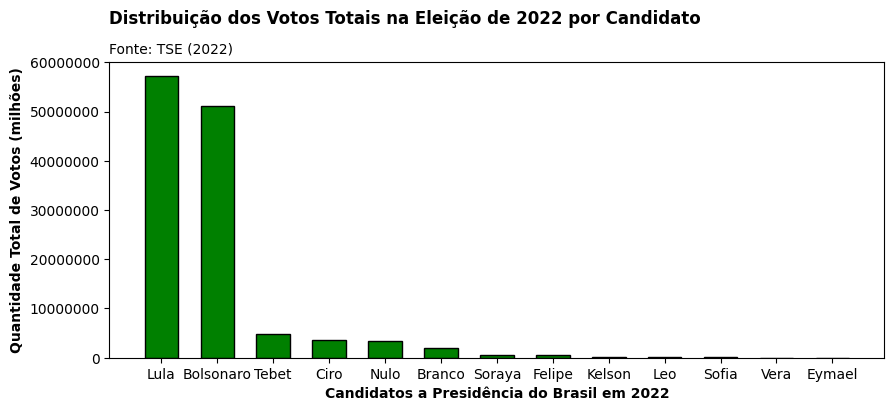

In [121]:
# Importando o Arquivo .csv e Abrindo Pacotes
import pandas as pd
import matplotlib.pyplot as plt
questao2=pd.read_csv('https://github.com/DanZavas/Data_Atv_8/raw/main/Presidente.csv',sep = ';', decimal=",",encoding = 'latin-1')

# Criando o Gráfico de Colunas
## Contabilização dos Votos
Ciro = questao2['CIRO_GOMES_QT_VOTOS_TOT'].sum()
Lula = questao2['LULA_QT_VOTOS_TOT'].sum()
Kelson = questao2['PADRE_KELMON_QT_VOTOS_TOT'].sum()
Tebet = questao2['SIMONE_TEBET_QT_VOTOS_TOT'].sum()
Vera = questao2['VERA_QT_VOTOS_TOT'].sum()
Sofia = questao2['SOFIA_MANZANO_QT_VOTOS_TOT'].sum()
Bolsonaro = questao2['JAIR_BOLSONARO_QT_VOTOS_TOT'].sum()
Eymael = questao2['CONSTITUINTE_EYMAEL_QT_VOTOS_TOT'].sum()
Felipe = questao2['FELIPE_DAVILA_QT_VOTOS_TOT'].sum()
Soraya = questao2['SORAYA_THRONICKE_QT_VOTOS_TOT'].sum()
Leo = questao2['LEO_PERICLES_QT_VOTOS_TOT'].sum()
Branco = questao2['BRANCO_QT_VOTOS_TOT'].sum()
Nulo = questao2['NULO_QT_VOTOS_TOT'].sum()
## Reunindo os Dados e IDs
col_bar_pres=[Ciro,Lula,Kelson,Tebet,Vera,Sofia,Bolsonaro,Eymael,Felipe,Soraya,Leo,Branco,Nulo]
col_bar_pres_labs=['Ciro','Lula','Kelson','Tebet','Vera','Sofia','Bolsonaro','Eymael','Felipe','Soraya','Leo','Branco','Nulo']
## Organizando a Ordem e Tamanho
sorted_data_labels=sorted(zip(col_bar_pres, col_bar_pres_labs), reverse=True)
data_sorted, labels_sorted=zip(*sorted_data_labels)
plt.figure(figsize=(10,4))
## Plotando o Gráfico
plt.bar(labels_sorted, data_sorted,width=0.6,color='green',edgecolor='black')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Candidatos a Presidência do Brasil em 2022',fontweight='bold')
plt.ylabel('Quantidade Total de Votos (milhões)',fontweight='bold')
plt.title('Fonte: TSE (2022)',loc='left',fontsize=10)
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribuição dos Votos Totais na Eleição de 2022 por Candidato',fontweight='bold',x=0.42)
plt.show()

##### **Item 2**
Faça um gráfico de pizza com as porcentagens de cada candidato na eleição incluindo os votos brancos e nulos.

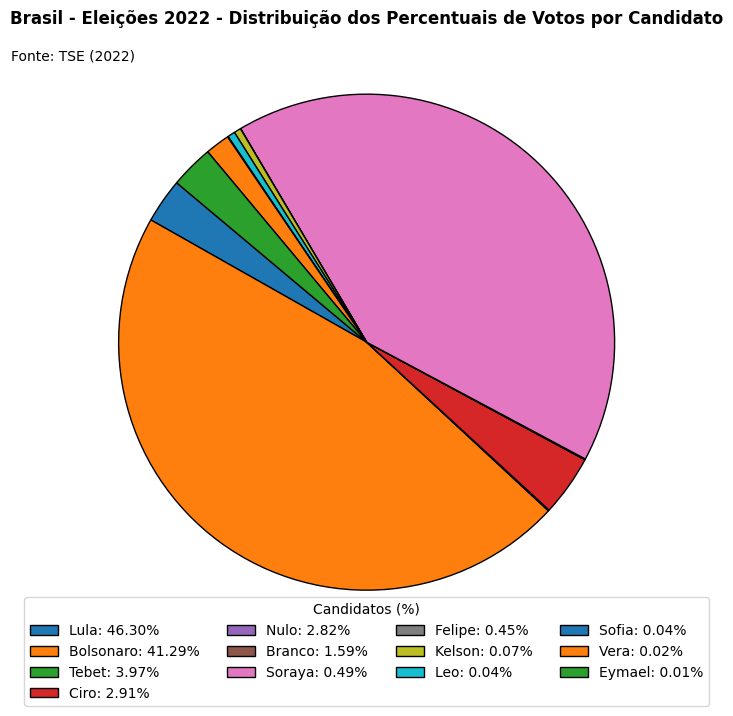

In [145]:
## Reunindo os Dados e IDs
col_bar_pres=[Ciro,Lula,Kelson,Tebet,Vera,Sofia,Bolsonaro,Eymael,Felipe,Soraya,Leo,Branco,Nulo]
col_bar_pres_labs=['Ciro','Lula','Kelson','Tebet','Vera','Sofia','Bolsonaro','Eymael','Felipe','Soraya','Leo','Branco','Nulo']
## Organizando a Ordem, Tamanho e Plotagem
plt.figure(figsize=(8,9))
total = sum(col_bar_pres)
percentages = [size / total * 100 for size in col_bar_pres]
sorted_data = sorted(zip(percentages, col_bar_pres, col_bar_pres_labs), reverse=True)
percentages_sorted, sizes_sorted, labels_sorted = zip(*sorted_data)
wedges, texts = plt.pie(
    col_bar_pres, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(
    wedges, [f'{col_bar_pres_labs}: {percentage:.2f}%' for col_bar_pres_labs, percentage in zip(labels_sorted, percentages_sorted)],
    title="Candidatos (%)",loc="upper center", bbox_to_anchor=(0.50, 0.1), ncol=4)
plt.title('Brasil - Eleições 2022 - Distribuição dos Percentuais de Votos por Candidato',loc='center',fontweight='bold')
plt.suptitle('Fonte: TSE (2022)',x=0.145,y=0.82,fontsize=10)
plt.show()

# QUESTÃO 3
##### A primeira imagem de um buraco negro foi capturada pelo Event Horizon Telescope (EHT) e revelada ao público em 10 de abril de 2019. Esta imagem histórica mostra a silhueta de um buraco negro supermassivo no centro da galáxia M87, localizada a cerca de 55 milhões de anos-luz da Terra. A imagem mostra um anel de luz brilhante ao redor de uma região escura, conhecida como sombra do buraco negro, que é causada pela distorção gravitacional extrema ao seu redor. O papel da linguagem Python nessa conquista é bem resumido na utilização das bibliotecas Numpy, Scipy, Pandas e Matplotlib. Baseado nessas informações faça as seguintes questões utilizando somente as bibliotecas Numpy e Matplotlib (2 Pontos):


##### **Item 1**
Tire uma selfie sua e apresente a foto através de um programa implementado em Python.

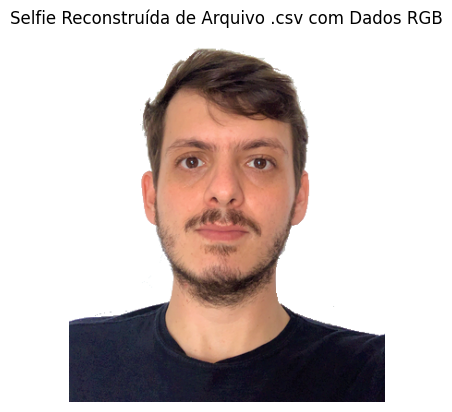

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# Tornando As Dimensões da Imagem em Variáveis
largura = 342
altura = 401

# Obtendo os Dados RGB da Imagem Armazenada no Github
selfie_rgb = np.genfromtxt('https://github.com/DanZavas/Data_Atv_8/raw/main/image_rgb_data.csv', delimiter=',', skip_header=1)

# Planificando e Remodelando Dentro das Dimensões Informadas
img_ary = selfie_rgb.flatten().reshape((altura, largura, 3))

# Apresentando a Selfie
img_ary1 = np.clip(img_ary, 0, 255).astype(np.uint8)
plt.imshow(img_ary1)
plt.axis('off')
plt.title('Selfie Reconstruída de Arquivo .csv com Dados RGB')
plt.show()


##### **Item 2**
Transforme a sua selfie em tons de preto e cinza.

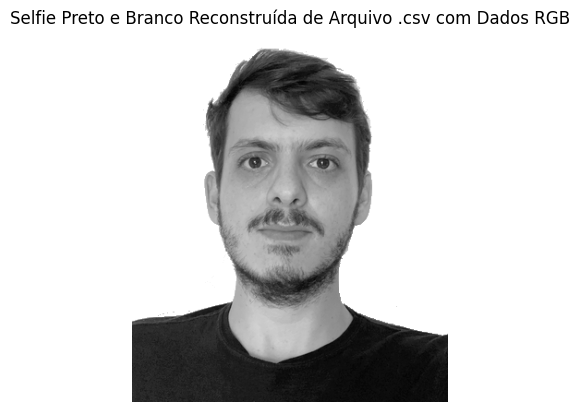

In [185]:
# Adicionando o Comando para Preto e Branco
gray_img = np.dot(img_ary[..., :3], [0.2989, 0.5870, 0.1140])
gray_img_clipped = np.clip(gray_img, 0, 255).astype(np.uint8)

# Mostrando a Selfie em Preto e Branco
plt.imshow(gray_img_clipped, cmap='gray')
plt.axis('off')
plt.title('Selfie Preto e Branco Reconstruída de Arquivo .csv com Dados RGB')
plt.show()

##### **Item 3**
Gire a sua selfie em 90 e 270 graus (Sentido anti-horário).

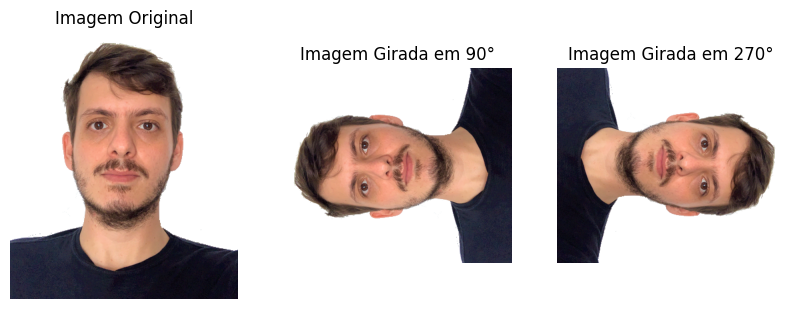

In [193]:
# Girando em 90° e em 270°
import matplotlib.pyplot as plt
import numpy as np

# Dimensões da Selfie
largura = 342
altura = 401

# Obtendo os Dados RGB da Imagem Armazenada no Github
selfie_rgb = np.genfromtxt('https://github.com/DanZavas/Data_Atv_8/raw/main/image_rgb_data.csv', delimiter=',', skip_header=1)

# Planificando e Remodelando Dentro das Dimensões Informadas
img_ary = selfie_rgb.flatten().reshape((altura, largura, 3))
img_ary1 = np.clip(img_ary, 0, 255).astype(np.uint8)

# Girando em 90°
img_rot_90 = np.rot90(img_ary1)

# Girando em 270°
img_rot_270 = np.rot90(img_ary1, 3)

# Imagem Original
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_ary1)
plt.title("Imagem Original")
plt.axis('off')

# Imagem em 90°
plt.subplot(1, 3, 2)
plt.imshow(img_rot_90)
plt.title("Imagem Girada em 90°")
plt.axis('off')

# Imagem em 270°
plt.subplot(1, 3, 3)
plt.imshow(img_rot_270)
plt.title("Imagem Girada em 270°")
plt.axis('off')

plt.show()
